# Лабораторная работа №1 
## Вариант 4
#### Волченков С.Г., Китель Б.В. 4230М   
   
      
##Загрузка данных с Git уже без лишних параметров

In [8]:
import pandas as pd
import openpyxl
import numpy as np

from openpyxl import load_workbook
from io import BytesIO
import urllib
from openpyxl.styles import Font

def load_workbook_from_url(url):
    file = urllib.request.urlopen(url).read()
    return load_workbook(filename = BytesIO(file))

url = "https://raw.githubusercontent.com/Lamp04ka/1/main/LB3V4.xlsx"

WorkBook = load_workbook_from_url(url)
WorkSheet = WorkBook.active

## Разметку данных по классам
добавления признака меток классов. 

In [9]:
def getRedRows(ds):
  RedRows = []
  for row in ds.iter_rows(max_col = ds.max_column - 1, min_row = 2, max_row = ds.max_row):
    red = 0
    for cell in row:
      if(cell.font.color.rgb == "FFFF0000"):
        red += 1
        if(red >= 2):
          RedRows.append(cell.row)
          break
  return RedRows

def getClassRows(RedRows):
  ClassRows = []
  col = 1
  for i in range(0, len(RedRows)-1):
    if(RedRows[i]+1 == RedRows[i+1]):
      col+=1
    else:
      if(col>3):
        for j in range(i,i+col):
          ClassRows.append(1)
        i+=col-1
        col=1
      else:
        for j in range(i,i+col):
          ClassRows.append(2)
        col=1
  for i in range(len(RedRows)-col,len(RedRows)):
    if(col>3):
      ClassRows.append(1)
    else:
      ClassRows.append(2)
  return ClassRows


RedRows = getRedRows(WorkSheet)
ClassRows = getClassRows(RedRows)

for col in WorkSheet.iter_cols(min_col = WorkSheet.max_column, max_col = WorkSheet.max_column, min_row=2, max_row = WorkSheet.max_row):
  for cell in col:
    if(RedRows.count(cell.row) == 0):
      cell.value = 0
    else:
      cell.value = ClassRows[RedRows.index(cell.row)]

##создания pandas dataframe

In [10]:
HeadersSheet = WorkSheet[1]
header = []
HeadersSheet[0].value = "time"
for i in HeadersSheet:
  header.append(i.value)
data_s = list(WorkSheet.values)
data_s = data_s[1:]

data = pd.DataFrame(data_s, columns=header)

Визуальное сравнения разбиение на классы(id элиментов отличается от номера строки в exel на 1)

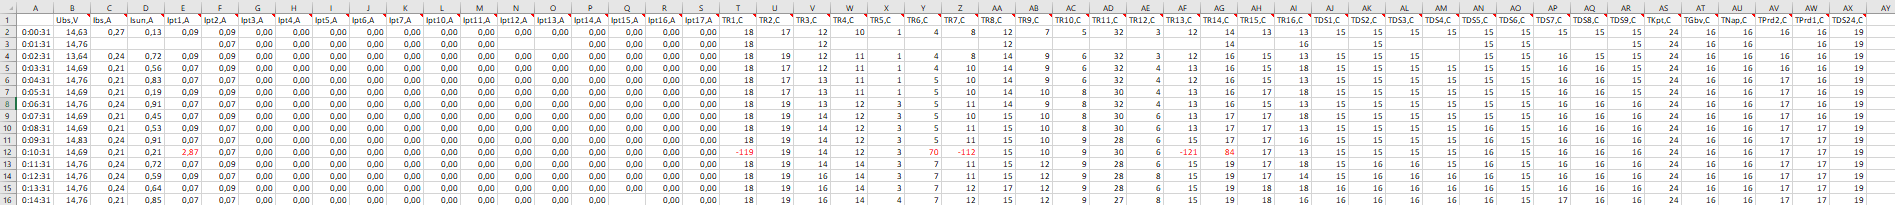

![1](https://raw.githubusercontent.com/Lamp04ka/1/main/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202023-05-28%20220023.png)

https://github.com/Lamp04ka/1/blob/main/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202023-05-28%20220023.png

In [14]:
data.reindex(np.linspace(0,15,15,dtype=int))

,time,"Ubs,V","Ibs,A","Isun,A","Ipt1,A","Ipt2,A","Ipt3,A","Ipt4,A","Ipt5,A","Ipt6,A",...,"TDS7,C","TDS8,C","TDS9,C","TKpt,C","TGbv,C","TNap,C","TPrd2,C","TPrd1,C","TDS24,C",Class
0,2014-05-02 00:00:31,14.63,0.27,0.13,0.09,0.09,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,24.0,16.0,16.0,16.0,16.0,19.0,0
1,2014-05-02 00:01:31,14.76,NaN,NaN,NaN,0.07,0.0,0.0,0.0,0.0,...,NaN,NaN,15.0,24.0,16.0,16.0,NaN,16.0,19.0,0
2,2014-05-02 00:02:31,13.64,0.24,0.72,0.09,0.09,0.0,0.0,0.0,0.0,...,16.0,15.0,15.0,24.0,16.0,16.0,16.0,16.0,19.0,0
3,2014-05-02 00:03:31,14.69,0.21,0.56,0.07,0.09,0.0,0.0,0.0,0.0,...,16.0,16.0,15.0,24.0,16.0,16.0,16.0,16.0,19.0,0
4,2014-05-02 00:04:31,14.76,0.21,0.83,0.07,0.07,0.0,0.0,0.0,0.0,...,16.0,16.0,15.0,24.0,16.0,16.0,17.0,16.0,19.0,0
5,2014-05-02 00:05:31,14.69,0.21,0.19,0.09,0.09,0.0,0.0,0.0,0.0,...,16.0,16.0,15.0,24.0,16.0,16.0,17.0,16.0,19.0,0
6,2014-05-02 00:06:31,14.76,0.24,0.91,0.07,0.07,0.0,0.0,0.0,0.0,...,16.0,16.0,16.0,24.0,16.0,16.0,17.0,16.0,19.0,0
7,2014-05-02 00:07:31,14.69,0.21,0.45,0.07,0.09,0.0,0.0,0.0,0.0,...,16.0,16.0,16.0,24.0,16.0,16.0,17.0,16.0,19.0,0
8,2014-05-02 00:08:31,14.69,0.21,0.53,0.09,0.07,0.0,0.0,0.0,0.0,...,16.0,16.0,16.0,24.0,16.0,16.0,17.0,17.0,19.0,0
9,2014-05-02 00:09:31,14.83,0.24,0.91,0.07,0.07,0.0,0.0,0.0,0.0,...,16.0,16.0,16.0,24.0,16.0,16.0,17.0,17.0,19.0,0


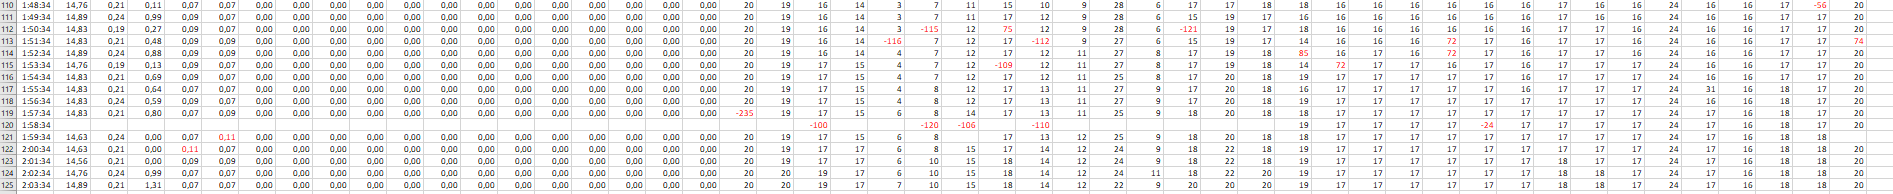

![2](https://raw.githubusercontent.com/Lamp04ka/1/main/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202023-05-28%20215611.png)

https://github.com/Lamp04ka/1/blob/main/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202023-05-28%20215611.png

In [15]:
data.reindex(np.linspace(109,124,16,dtype=int))

,time,"Ubs,V","Ibs,A","Isun,A","Ipt1,A","Ipt2,A","Ipt3,A","Ipt4,A","Ipt5,A","Ipt6,A",...,"TDS7,C","TDS8,C","TDS9,C","TKpt,C","TGbv,C","TNap,C","TPrd2,C","TPrd1,C","TDS24,C",Class
109,2014-05-02 01:49:34,14.89,0.24,0.99,0.09,0.07,0.0,0.0,0.0,0.0,...,17.0,16.0,16.0,24.0,16.0,16.0,17.0,17.0,20.0,0
110,2014-05-02 01:50:34,14.83,0.19,0.27,0.09,0.07,0.0,0.0,0.0,0.0,...,17.0,17.0,16.0,24.0,16.0,16.0,17.0,17.0,20.0,1
111,2014-05-02 01:51:34,14.83,0.21,0.48,0.09,0.09,0.0,0.0,0.0,0.0,...,17.0,17.0,16.0,24.0,16.0,16.0,17.0,17.0,74.0,1
112,2014-05-02 01:52:34,14.89,0.24,0.88,0.09,0.09,0.0,0.0,0.0,0.0,...,17.0,17.0,16.0,24.0,16.0,16.0,17.0,17.0,20.0,1
113,2014-05-02 01:53:34,14.76,0.19,0.13,0.09,0.07,0.0,0.0,0.0,0.0,...,17.0,17.0,17.0,24.0,16.0,16.0,17.0,17.0,20.0,1
114,2014-05-02 01:54:34,14.83,0.21,0.69,0.09,0.07,0.0,0.0,0.0,0.0,...,17.0,17.0,17.0,24.0,16.0,16.0,17.0,17.0,20.0,0
115,2014-05-02 01:55:34,14.83,0.21,0.64,0.07,0.07,0.0,0.0,0.0,0.0,...,17.0,17.0,17.0,24.0,31.0,16.0,18.0,17.0,20.0,0
116,2014-05-02 01:56:34,14.83,0.24,0.59,0.09,0.07,0.0,0.0,0.0,0.0,...,17.0,17.0,17.0,24.0,16.0,16.0,18.0,17.0,20.0,0
117,2014-05-02 01:57:34,14.83,0.21,0.80,0.07,0.09,0.0,0.0,0.0,0.0,...,17.0,17.0,17.0,24.0,17.0,16.0,18.0,17.0,20.0,0
118,2014-05-02 01:58:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,17.0,17.0,24.0,17.0,16.0,18.0,17.0,20.0,2


Как можно увидеть класы разбиты коректно

##Заполнение пробелов (NaN) в признаках

In [ ]:
data = data.ffill()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 51 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     1438 non-null   datetime64[ns]
 1   Ubs,V    1438 non-null   float64       
 2   Ibs,A    1438 non-null   float64       
 3   Isun,A   1438 non-null   float64       
 4   Ipt1,A   1438 non-null   float64       
 5   Ipt2,A   1438 non-null   float64       
 6   Ipt3,A   1438 non-null   float64       
 7   Ipt4,A   1438 non-null   float64       
 8   Ipt5,A   1438 non-null   float64       
 9   Ipt6,A   1438 non-null   float64       
 10  Ipt7,A   1438 non-null   float64       
 11  Ipt10,A  1438 non-null   float64       
 12  Ipt11,A  1438 non-null   float64       
 13  Ipt12,A  1438 non-null   float64       
 14  Ipt13,A  1438 non-null   float64       
 15  Ipt14,A  1438 non-null   float64       
 16  Ipt15,A  1438 non-null   float64       
 17  Ipt16,A  1438 non-null   float64 

,time,"Ubs,V","Ibs,A","Isun,A","Ipt1,A","Ipt2,A","Ipt3,A","Ipt4,A","Ipt5,A","Ipt6,A",...,"TDS7,C","TDS8,C","TDS9,C","TKpt,C","TGbv,C","TNap,C","TPrd2,C","TPrd1,C","TDS24,C",Class
0,2014-05-02 00:00:31,14.63,0.27,0.13,0.09,0.09,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,24.0,16.0,16.0,16.0,16.0,19.0,0
1,2014-05-02 00:01:31,14.76,0.27,0.13,0.09,0.07,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,24.0,16.0,16.0,16.0,16.0,19.0,0
2,2014-05-02 00:02:31,13.64,0.24,0.72,0.09,0.09,0.0,0.0,0.0,0.0,...,16.0,15.0,15.0,24.0,16.0,16.0,16.0,16.0,19.0,0
3,2014-05-02 00:03:31,14.69,0.21,0.56,0.07,0.09,0.0,0.0,0.0,0.0,...,16.0,16.0,15.0,24.0,16.0,16.0,16.0,16.0,19.0,0
4,2014-05-02 00:04:31,14.76,0.21,0.83,0.07,0.07,0.0,0.0,0.0,0.0,...,16.0,16.0,15.0,24.0,16.0,16.0,17.0,16.0,19.0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data_dig = data.drop(["time"],axis=1)
data_1 = data.drop(["time"],axis=1)
data_2 = pd.DataFrame(scaler.fit_transform(data_dig),  columns = data_dig.columns)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X1 = data_1.drop(["Class"],axis=1)
y = data_1["Class"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, random_state=0)

gbrt = GradientBoostingClassifier()
gbrt.fit(X1_train, y1_train)
print("GBRT data 1 r2: ", gbrt.score(X1_test,y1_test))

GBRT data 1 r2:  0.9333333333333333


In [ ]:
X2 = data_2.drop(["Class"],axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=0)

gbrt2 = GradientBoostingClassifier()
gbrt2.fit(X2_train, y2_train)
y2_pred = gbrt2.predict(X2_test)
print("GBRT2 data 2: ", gbrt2.score(X2_test,y2_test))

GBRT2 data 2:  0.9305555555555556


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop, Adam
# Создание модели
model = Sequential()
y_train = tf.keras.utils.to_categorical(y1_train, 3)
y_test = tf.keras.utils.to_categorical(y1_test, 3)
model.add(layers.Conv1D(128, 4, activation='relu', padding='same', input_shape=(X1.shape[1], 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(128, 4, activation='relu', padding='same'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(3, activation="softmax"))
model.summary()

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

# Обучение модели
m=model.fit(X1_train, y_train, validation_data=(X1_test, y_test), epochs=100, batch_size=128)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 49, 128)           640       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 128)           65664     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 66,691
Trainable params: 66,691
Non-traina

In [ ]:
print(np.max(m.history["val_acc"]))

0.949999988079071


In [ ]:
arr = []
for number in range(5):
    model = Sequential()
    y_train = tf.keras.utils.to_categorical(y1_train, 3)
    y_test = tf.keras.utils.to_categorical(y1_test, 3)
    model.add(layers.Conv1D(128, 4, activation='relu', padding='same', input_shape=(X1.shape[1], 1)))
    for i in range(number):
        model.add(layers.MaxPooling1D(2))
        model.add(layers.Conv1D(128, 4, activation='relu', padding='same'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(3, activation="softmax"))
    model.summary()
    # Компиляция модели
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

    # Обучение модели
    m=model.fit(X1_train, y_train, validation_data=(X1_test, y_test), epochs=100, batch_size=128)
    arr.append(np.max(m.history["val_acc"]))


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_44 (Conv1D)          (None, 49, 128)           640       
                                                                 
 global_max_pooling1d_12 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_12 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
9/9 [==============================] - 2s 44ms/step - loss: 2.1609 - acc: 0.6957 - val_loss: 1.1469 - val_acc: 0.7833
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 0.8149 - acc: 0.8627 - val_loss: 0.6024 - val_ac

In [ ]:
print(arr)

[0.9305555820465088, 0.9472222328186035, 0.9611111283302307, 0.9666666388511658, 0.9638888835906982]


Делаем вывод что модель с 3 слоями Conv1D показала наилучший результат по val_acc


In [ ]:
ns = np.linspace(32,256,8,dtype=int)
print(ns)

[ 32  64  96 128 160 192 224 256]


In [ ]:
arr = []
for number in ns:
    model = Sequential()
    y_train = tf.keras.utils.to_categorical(y1_train, 3)
    y_test = tf.keras.utils.to_categorical(y1_test, 3)
    model.add(layers.Conv1D(number, 4, activation='relu', padding='same', input_shape=(X1.shape[1], 1)))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(number, 4, activation='relu', padding='same'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(number, 4, activation='relu', padding='same'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(3, activation="softmax"))
    model.summary()
    # Компиляция модели
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

    # Обучение модели
    m=model.fit(X1_train, y_train, validation_data=(X1_test, y_test), epochs=100, batch_size=128, verbose=0)
    arr.append(np.max(m.history["val_acc"]))
print(arr)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_61 (Conv1D)          (None, 49, 32)            160       
                                                                 
 max_pooling1d_40 (MaxPoolin  (None, 24, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_62 (Conv1D)          (None, 24, 32)            4128      
                                                                 
 max_pooling1d_41 (MaxPoolin  (None, 12, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_63 (Conv1D)          (None, 12, 32)            4128      
                                                                 
 global_max_pooling1d_20 (Gl  (None, 32)             

In [ ]:
print(arr)

[0.9527778029441833, 0.9555555582046509, 0.9694444537162781, 0.9638888835906982, 0.9583333134651184, 0.9583333134651184, 0.9722222089767456, 0.9638888835906982]


Делаем вывод что модель с 3 слоями Conv1D показала наилучший результат c 224 нейронами и 3 слоями conv1D